In [1]:
import pandas as pd

In [35]:
df_all = pd.read_csv('all_labels/labels.csv',parse_dates=['datetime'])


In [36]:
df_3=df_all[df_all['dataset_id']==3]

Deal with dataset 1 and 2 first because they have duplicated photos

In [27]:
df_1_2=df[df['dataset_id'].isin([1,2])]

In [3]:
df_2=df[df['dataset_id']==2]

In [28]:
grouped=df_1_2.groupby(['Location','datetime'])
dedup_count=grouped['AQI_Class'].count()
dedup_count.shape

(458,)

In [41]:
pd.concat([df_1_2.groupby(['datetime','Location']).first(),df_3]).to_csv('deduped_labels/all_sets.csv',index=False)

In [33]:
df_1_2.groupby(['datetime','Location']).first().to_csv('')

,,Filename,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class,dataset_id
datetime,Location,,,,,,,,,,
2017-09-21 15:00:00,Mirpur National Stadium,199.jpg,NaN,85.00,NaN,NaN,NaN,NaN,NaN,b_Moderate,2
2018-03-23 09:00:00,"Hazrat Shahjalal International Airport, Dhaka",198.jpg,NaN,217.00,NaN,NaN,NaN,NaN,NaN,e_Very_Unhealthy,2
2018-06-17 18:00:00,Agargaon,222.jpg,NaN,140.00,NaN,NaN,NaN,NaN,NaN,c_Unhealthy_for_Sensitive_Groups,2
2018-06-18 12:00:00,Banani,197.jpg,NaN,128.00,NaN,NaN,NaN,NaN,NaN,c_Unhealthy_for_Sensitive_Groups,2
2018-08-07 18:00:00,Mohammadpur,220.jpg,NaN,72.00,NaN,NaN,NaN,NaN,NaN,b_Moderate,2
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-13 08:30:00,Bengaluru,BENGR_Mod_2023-03-13-08.30-1-1.jpg,53.0,27.00,49.00,22.00,304.00,7.0,16.00,b_Moderate,1
2023-03-13 10:00:00,Mumbai,MH_UN_2023-03-13-10.00-1-1.jpg,197.0,114.00,108.00,NaN,NaN,NaN,64.00,d_Unhealthy,1
2023-03-16 12:30:00,"Biratnagar, Nepal",BIR_UH_2023-03-16-12.30-1-1.jpg,154.0,65.89,95.23,78.31,0.36,3.5,1.03,d_Unhealthy,1


In [4]:
grouped=df_2.groupby(['Location','datetime'])
dedup_count=grouped['AQI_Class'].count()
dedup_count.shape

(406,)

In [5]:
dedup_count=dedup_count.sample(frac=1, random_state=3)
n=len(dedup_count)
train_group=dedup_count[:int(0.6*n)]
val_group=dedup_count[int(0.6*n):int(0.8*n)]
test_group=dedup_count[int(0.8*n):]
print(train_group.sum(),val_group.sum(),test_group.sum())

1122 397 293


In [6]:
def label_for_group(group):
  data=[]
  for i in group.index:
    Location,dt=i
    data.append(df.loc[(df['Location']==Location)&(df['datetime']==dt)])
  return pd.concat(data)

In [7]:
train_label=label_for_group(train_group)
val_label=label_for_group(val_group)
test_label=label_for_group(test_group)

Add dataset 3

In [45]:
df3=df[df['dataset_id']==3].sample(frac=1, random_state=3)

In [46]:
n3=len(df3)

In [47]:
train_label=pd.concat([train_label,df3[:int(n3*0.6)]])
val_label=pd.concat([val_label,df3[int(n3*0.6):int(n3*0.8)]])
test_label=pd.concat([test_label,df3[int(n3*0.8):]])

In [11]:
train_label.shape

(1122, 12)

In [12]:
val_label.shape

(397, 12)

In [48]:
test_label.shape

(3323, 12)

In [15]:
train_label.to_csv('train_label_dataset2.csv',index=False)
val_label.to_csv('val_label_dataset2.csv',index=False)
test_label.to_csv('test_label_dataset2.csv',index=False)

In [17]:
def balanced_sample(label_df,each_class_num):
    return pd.concat([label_df[label_df['AQI_Class']==i].sample(each_class_num,replace=True,random_state=3) for i in ['a_Good', 'b_Moderate', 'c_Unhealthy_for_Sensitive_Groups',
       'd_Unhealthy', 'e_Very_Unhealthy', 'f_Severe']]).sample(frac=1,random_state=3)

In [57]:
train_label['AQI_Class'].value_counts().sort_index().index

Index(['a_Good', 'b_Moderate', 'c_Unhealthy_for_Sensitive_Groups',
       'd_Unhealthy', 'e_Very_Unhealthy', 'f_Severe'],
      dtype='object')

<AxesSubplot: title={'center': 'Counts of each class on training set'}>

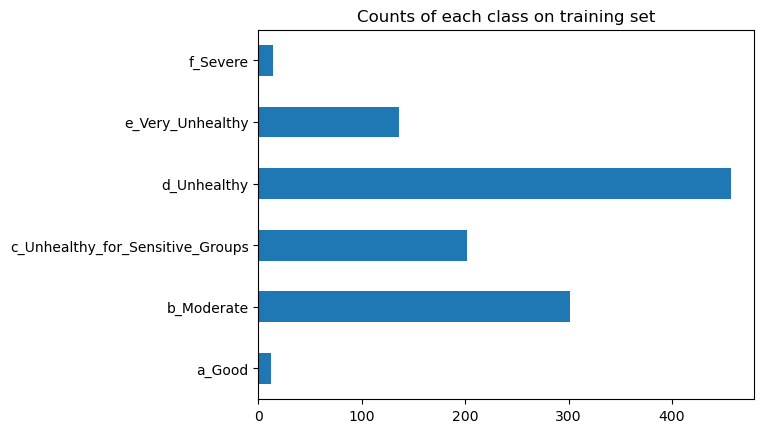

In [8]:
train_label['AQI_Class'].value_counts().sort_index().plot.barh(title='Counts of each class on training set')

<AxesSubplot: title={'center': 'Counts of each class on training set'}>

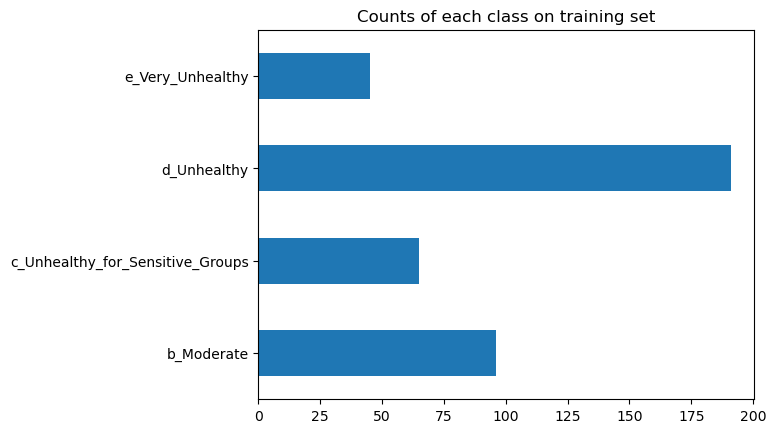

In [13]:
val_label['AQI_Class'].value_counts().sort_index().plot.barh(title='Counts of each class on training set')

In [10]:
train_label['AQI_Class'].value_counts().median()

169.0

In [14]:
val_label['AQI_Class'].value_counts().median()

80.5

In [18]:
train_label_balanced=balanced_sample(train_label,200)
val_label_balanced=balanced_sample(val_label,80)

ValueError: a must be greater than 0 unless no samples are taken

In [65]:
train_label_balanced.to_csv('train_label_balanced.csv',index=False)
val_label_balanced.to_csv('val_label_balanced.csv',index=False)